# Mapping 

In [7]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
poa = gpd.read_file("Shape\POA_2021_AUST_GDA2020_SHP\POA_2021_AUST_GDA2020.shp")
sa1 = gpd.read_file("Shape\SA1_2021_AUST_SHP_GDA2020\SA1_2021_AUST_GDA2020.shp")
sua = gpd.read_file("Shape\SUA_2021_AUST_GDA2020_SHP\SUA_2021_AUST_GDA2020.shp")
lga = gpd.read_file("Shape\LGA_2021_AUST_GDA2020_SHP\LGA_2021_AUST_GDA2020.shp")

In [9]:
mel_gel_sau = sua[(sua["SUA_CODE21"] == "2008") | (sua["SUA_CODE21"] == "2011")]
victoria_sa1 = sa1[sa1["SA1_CODE21"].str.startswith("2")]
victoria_poa = poa[poa["POA_CODE21"].str.startswith("3")]
victoria_lga = lga[lga["STE_NAME21"].str.startswith("V")]

In [10]:
sa1_selected  = gpd.overlay(victoria_sa1, mel_gel_sau, how='intersection')
poa_selected  = gpd.overlay(victoria_poa, mel_gel_sau, how='intersection')
lga_selected  = gpd.overlay(victoria_lga, mel_gel_sau, how='intersection')

C:\Users\danla\AppData\Local\Temp\ipykernel_24144\1719512743.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 345 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  sa1_selected  = gpd.overlay(victoria_sa1, mel_gel_sau, how='intersection')
C:\Users\danla\AppData\Local\Temp\ipykernel_24144\1719512743.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: GEOGCS["GDA2020",DATUM["GDA2020",SPHEROID["GRS_198 ...
Right CRS: GEOGCS["GDA2020",DATUM["GDA2020",SPHEROID["GRS_198 ...

  poa_selected  = gpd.overlay(victoria_poa, mel_gel_sau, how='intersection')
C:\Users\danla\AppData\Local\Temp\ipykernel_24144\1719512743.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to mat

In [11]:
intersection_df  = gpd.overlay(sa1_selected, poa_selected, how='intersection')
intersection_df['intersection_area'] = intersection_df.geometry.area
intersection_df = intersection_df.sort_values(by='intersection_area', ascending=False)
intersection_df = intersection_df.groupby('SA1_CODE21', as_index=False).first()

assigment = intersection_df[["SA1_CODE21", "POA_CODE21"]]
sa1_to_poa = sa1_selected.merge(assigment, on="SA1_CODE21")

C:\Users\danla\AppData\Local\Temp\ipykernel_24144\22987385.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: GEOGCS["GDA2020",DATUM["GDA2020",SPHEROID["GRS_198 ...
Right CRS: GEOGCS["GDA2020",DATUM["GDA2020",SPHEROID["GRS_198 ...

  intersection_df  = gpd.overlay(sa1_selected, poa_selected, how='intersection')
C:\Users\danla\AppData\Local\Temp\ipykernel_24144\22987385.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 623 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersection_df  = gpd.overlay(sa1_selected, poa_selected, how='intersection')
C:\Users\danla\AppData\Local\Temp\ipykernel_24144\22987385.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected C

In [14]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

my_cmap = "viridis"
plot_x = 16
plot_y = 12
subtitle_fontsize = 25
title_fontsize = 30
legend_fontsize = 20

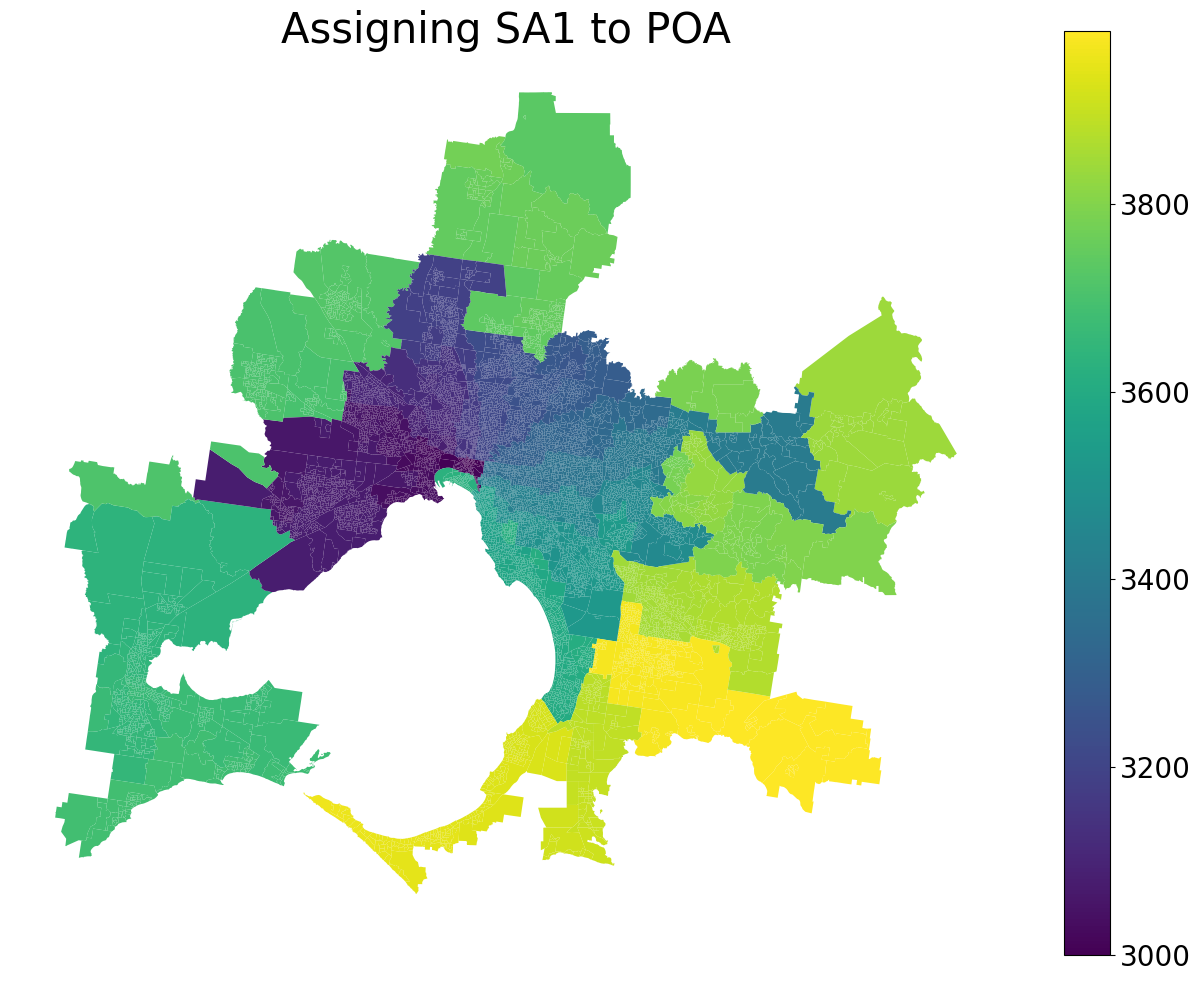

In [23]:
fig, ax1 = plt.subplots(figsize=(plot_x, plot_y))
sa1_to_poa.plot(column="POA_CODE21", cmap=my_cmap, ax=ax1)
ax1.set_xticks([])  
ax1.set_yticks([])  
ax1.set_title("Assigning SA1 to POA", fontsize=title_fontsize)  
ax1.axis('off')

sm5 = ScalarMappable(cmap=my_cmap)
temp = sa1_to_poa["POA_CODE21"].astype(int)
sm5.set_array(temp)
cbar5 = plt.colorbar(sm5, ax=ax1)
cbar5.ax.tick_params(axis='y', labelsize=legend_fontsize)
plt.show()


In [20]:
intersection_df  = gpd.overlay(sa1_selected, lga_selected, how='intersection')
intersection_df['intersection_area'] = intersection_df.geometry.area
intersection_df = intersection_df.sort_values(by='intersection_area', ascending=False)
intersection_df = intersection_df.groupby('SA1_CODE21', as_index=False).first()

assigment = intersection_df[["SA1_CODE21", "LGA_CODE21"]]
sa1_to_lga = sa1_selected.merge(assigment, on="SA1_CODE21")

C:\Users\danla\AppData\Local\Temp\ipykernel_24144\3184766781.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: GEOGCS["GDA2020",DATUM["GDA2020",SPHEROID["GRS_198 ...
Right CRS: GEOGCS["GDA2020",DATUM["GDA2020",SPHEROID["GRS_198 ...

  intersection_df  = gpd.overlay(sa1_selected, lga_selected, how='intersection')
C:\Users\danla\AppData\Local\Temp\ipykernel_24144\3184766781.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 1018 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersection_df  = gpd.overlay(sa1_selected, lga_selected, how='intersection')
C:\Users\danla\AppData\Local\Temp\ipykernel_24144\3184766781.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a proj

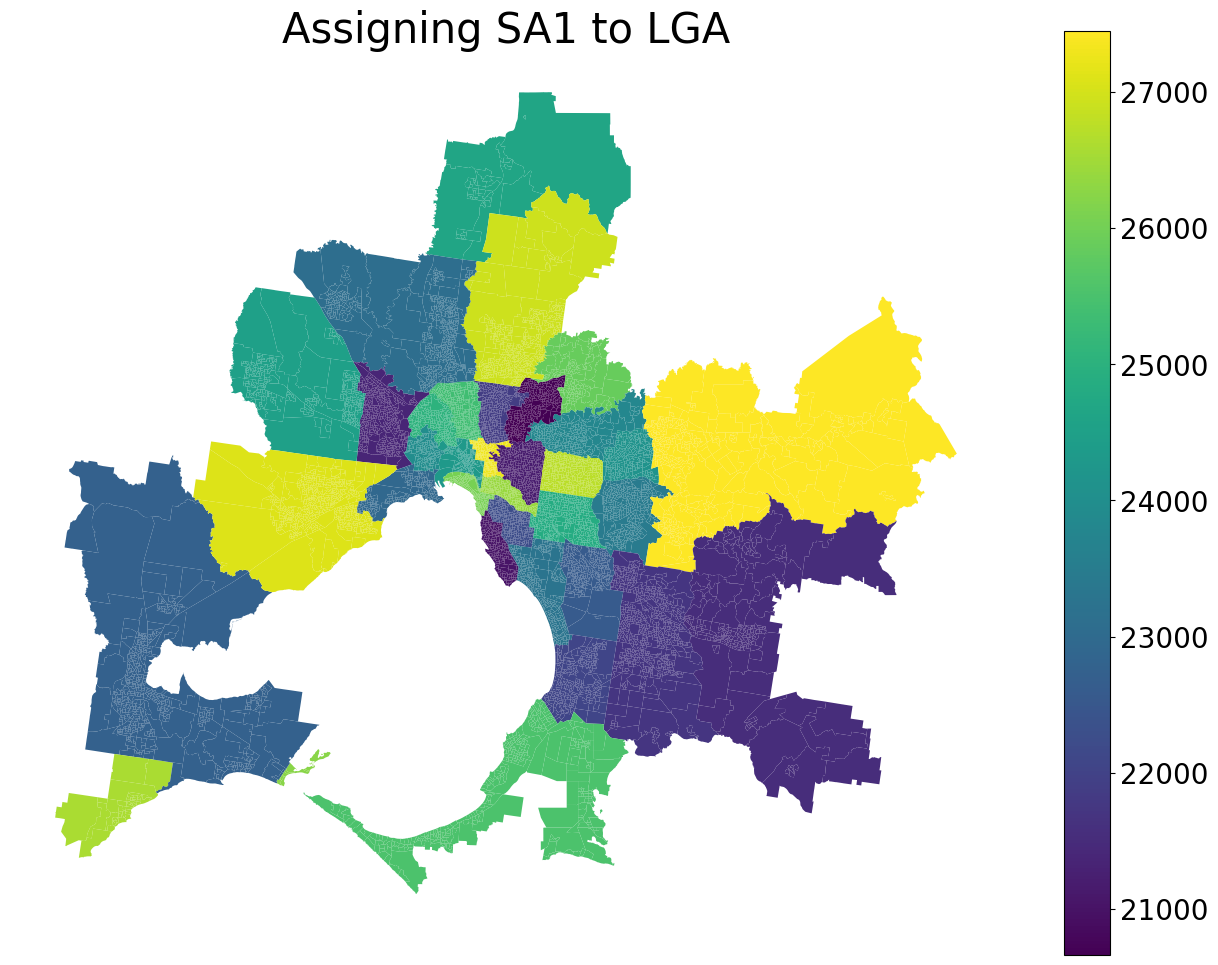

In [22]:
fig, ax1 = plt.subplots(figsize=(plot_x, plot_y))
sa1_to_lga.plot(column="LGA_CODE21", cmap=my_cmap, ax=ax1)
ax1.set_xticks([])  
ax1.set_yticks([])  
ax1.set_title("Assigning SA1 to LGA", fontsize=title_fontsize)  
ax1.axis('off')

sm5 = ScalarMappable(cmap=my_cmap)
temp = sa1_to_lga["LGA_CODE21"].astype(int)
sm5.set_array(temp)
cbar5 = plt.colorbar(sm5, ax=ax1)
cbar5.ax.tick_params(axis='y', labelsize=legend_fontsize)
plt.show()

In [48]:
sa = sa1_to_poa[["POA_CODE21", "SA1_CODE21", "SA2_CODE21", "SA3_CODE21", "SA4_CODE21"]]
lga = sa1_to_lga[["SA1_CODE21", "LGA_CODE21"]]

In [64]:
area_code = sa.merge(lga, on="SA1_CODE21", how="outer")
area_code = area_code.drop_duplicates(subset='SA1_CODE21', keep='first')

In [71]:
synthetic = pd.read_csv("Data\clean_data.csv")
synthetic["SA1_CODE21"] = synthetic["SA1_CODE21"].astype(str)
synthetic = synthetic.merge(area_code, on="SA1_CODE21", how="inner")
desired_columns = ['POA_CODE21', 'SA1_CODE21', 'SA2_CODE21', 'SA3_CODE21', 'SA4_CODE21', 'LGA_CODE21']

new_order = desired_columns + [col for col in synthetic.columns if col not in desired_columns]
synthetic = synthetic[new_order]

In [72]:
len(synthetic["SA1_CODE21"].unique()), len(synthetic["POA_CODE21"].unique()), len(synthetic["LGA_CODE21"].unique())

(11666, 281, 38)

In [73]:
synthetic.to_csv('Data\population.csv', index=False)
area_code.to_csv('Data\\area_codes.csv', index=False)

In [ ]:
sa1_to_poa.to_file('Shape\sa1_to_poa.gpkg', driver='GPKG')
sa1_to_lga.to_file('Shape\sa1_to_lga.gpkg', driver='GPKG')
poa_selected.to_file('Shape\poa_selected.gpkg', driver='GPKG')